<a href="https://colab.research.google.com/github/lmcanavals/dip/blob/main/02_01_basic_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base = "https://raw.githubusercontent.com/lmcanavals/dip/main/imagenes/"

In [4]:
img = "bird.png"
url = f"{base}{img}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  266k  100  266k    0     0  1286k      0 --:--:-- --:--:-- --:--:-- 1292k


In [42]:
def show(im, size=8):
  _, ax = plt.subplots(figsize=(size, size))
  ax.imshow(im, interpolation="nearest")
  plt.tight_layout()
  plt.show()

In [43]:
def loadImg(img):
  im = cv2.imread(img)
  return im[:,:,::-1]

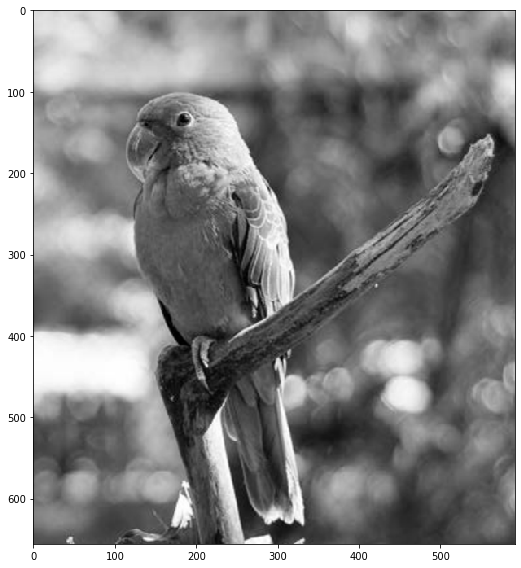

In [64]:
im = loadImg(img)
show(im)

## Operador Inverso

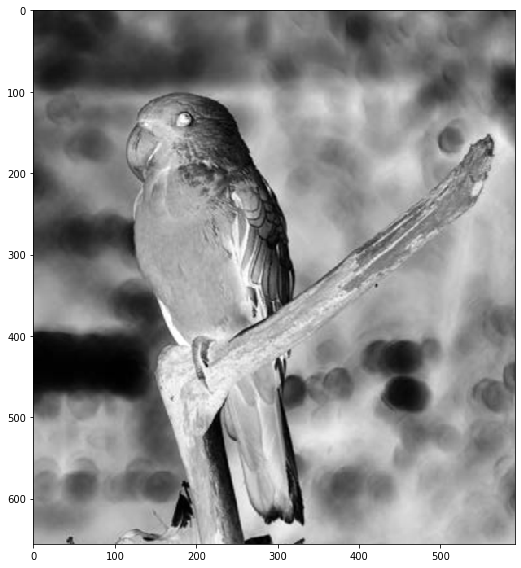

In [45]:
show(255 - im)

## Umbral

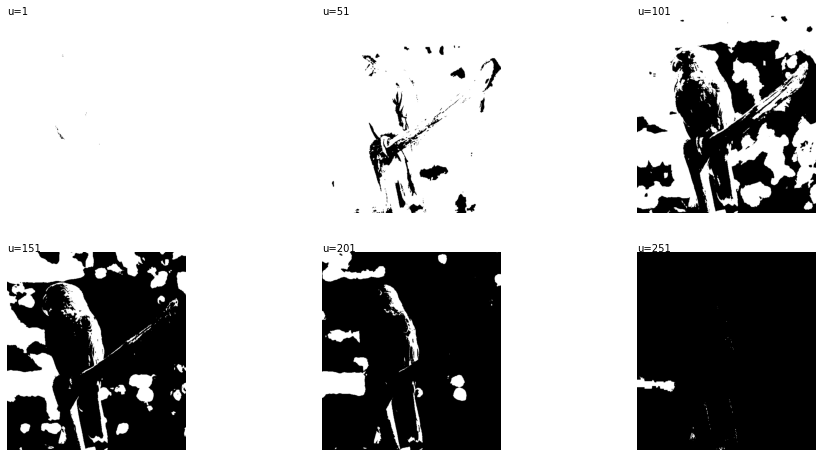

In [65]:
fig = plt.figure(figsize=(16, 8))
i = 1
for u in range(1, 255, 50):
  a = fig.add_subplot(2, 3, i)
  i += 1
  plt.axis('off')
  aux = im.copy()
  aux[aux > u] = 255
  aux[aux <= u] = 0
  plt.imshow(aux)
  plt.text(0, 0, f"u={u}")
plt.show()

## Intervalo umbral de gris

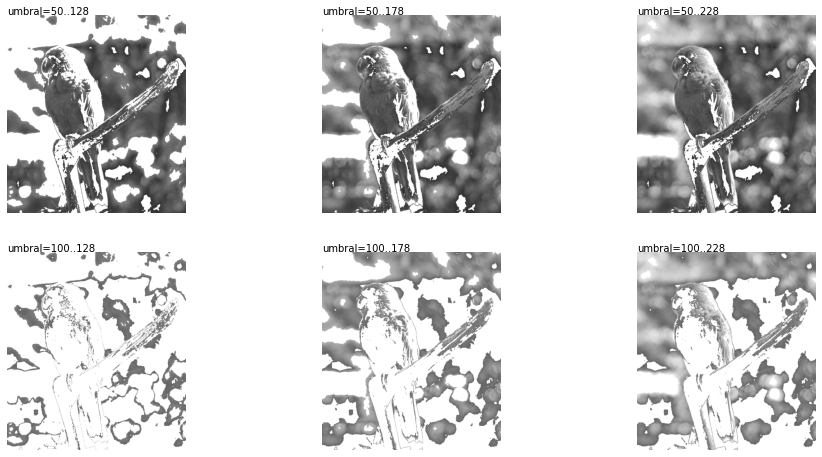

In [77]:
fig = plt.figure(figsize=(16, 8))
i = 1
for u1 in range(50, 128, 50):
  for u2 in range(128, 254, 50):
    a = fig.add_subplot(2, 3, i)
    i += 1
    plt.axis('off')
    aux = im.copy()
    aux[aux < u1] = 255
    aux[aux > u2] = 255
    plt.imshow(aux)
    plt.text(0, 0, f"umbral={u1}..{u2}")
plt.show()

## Intervalo umbral extendido

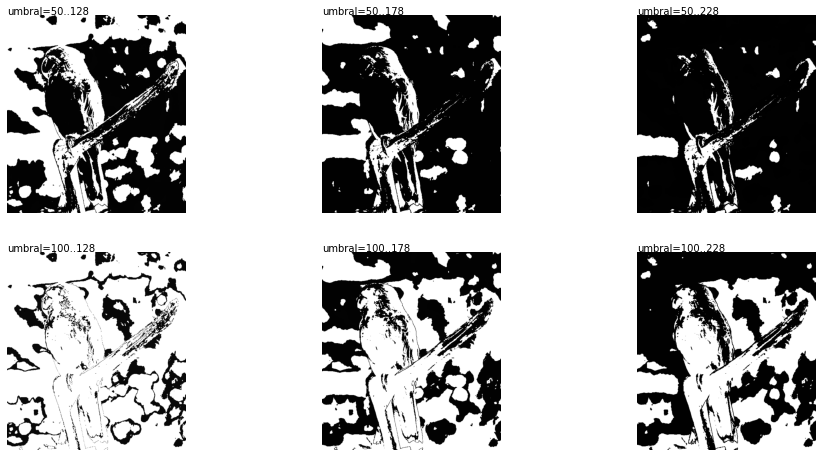

In [78]:
fig = plt.figure(figsize=(16, 8))
i = 1
for u1 in range(50, 128, 50):
  for u2 in range(128, 254, 50):
    a = fig.add_subplot(2, 3, i)
    i += 1
    plt.axis('off')
    aux = im.copy()
    aux[aux < u1] = 255
    aux[aux > u2] = 255
    idx = (aux >= u1) & (aux <= u2)
    aux[idx] = 255 * (aux[idx] - u1) / (u2 - u1)
    plt.imshow(aux)
    plt.text(0, 0, f"umbral={u1}..{u2}")
plt.show()

In [75]:
a = np.array([1, 2, 3, 4, 5, 6, 7])
a
a > 4

array([False, False, False, False,  True,  True,  True])